<a href="https://colab.research.google.com/github/k-v-n-p/mwd/blob/main/Phase_2_mt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1**

In [8]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import resnet18
from torchvision.datasets import Caltech101
from torch.utils.data import DataLoader
import skimage.io
import skimage.color
import numpy as np
import cv2
from scipy.stats import moment
from skimage.feature import hog
import matplotlib.pyplot as plt
import PIL
from google.colab.patches import cv2_imshow
from PIL import Image
from skimage import io, color, filters
from skimage.color import rgb2gray
import pandas as pd

In [12]:
caltech101_dataset = Caltech101(root='./data', download=True)

RuntimeError: ignored

In [13]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv('/content/output_Consolidated (2).csv')
df=df.dropna()
# Convert string representations of lists to actual lists
df['Image'] = df['Feature Vector CM'].apply(literal_eval)
df['Feature Vector CM'] = df['Feature Vector CM'].apply(literal_eval)
df['Feature Vector HOG'] = df['Feature Vector HOG'].apply(literal_eval)
df['Feature Vector Resnet50 AvgPool'] = df['Feature Vector Resnet50 AvgPool'].apply(literal_eval)
df['Feature Vector Resnet50 Layer3'] = df['Feature Vector Resnet50 Layer3'].apply(literal_eval)
df['Feature Vector Resnet50 FC'] = df['Feature Vector Resnet50 FC'].apply(literal_eval)
df

,ImageID,Feature Vector CM,Feature Vector HOG,Feature Vector Resnet50 AvgPool,Feature Vector Resnet50 Layer3,Feature Vector Resnet50 FC,Image
0,0.0,"[100.69666666666667, 42.527222523409115, 82.04...","[1525.7460257360444, 2054.6132694859325, 3816....","[0.38452890515327454, 0.22774693369865417, 0.5...","[0.0916738212108612, 0.011883001774549484, 0.0...","[1.7503337860107422, -0.36116456985473633, 1.9...","[100.69666666666667, 42.527222523409115, 82.04..."
1,1.0,"[17.573333333333334, 18.259005692777713, 62.56...","[790.1138777702237, 1085.156641985866, 2346.25...","[0.5881599187850952, 0.09654495865106583, 0.34...","[0.09023717045783997, 0.0004165112623013556, 0...","[-0.4572324752807617, -2.443110466003418, -0.6...","[17.573333333333334, 18.259005692777713, 62.56..."
2,2.0,"[234.06666666666666, 29.421911713702237, -91.2...","[52.29822128134704, 880.471281897526, 433.1304...","[0.6112033724784851, 0.06909631937742233, 0.38...","[0.06605225056409836, 0.008654453791677952, 0....","[7.684634208679199, 1.045159101486206, -0.0214...","[234.06666666666666, 29.421911713702237, -91.2..."
3,3.0,"[164.01333333333332, 65.07298329994988, -204.7...","[1417.3153627042086, 696.5415806948427, 287.86...","[0.7125579118728638, 0.17717497050762177, 0.36...","[0.05628224462270737, 0.008036183193325996, 0....","[0.20773659646511078, 0.4876280725002289, 2.23...","[164.01333333333332, 65.07298329994988, -204.7..."
4,4.0,"[102.15666666666667, 21.147232810832616, -69.9...","[617.6338272474198, 4.0, 772.4635366228489, 14...","[0.47124502062797546, 0.17865042388439178, 0.6...","[0.0752221941947937, 0.011122970841825008, 0.0...","[3.529961347579956, 0.4599865972995758, 1.4094...","[102.15666666666667, 21.147232810832616, -69.9..."
...,...,...,...,...,...,...,...
8006,7995.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 6.0, 68.56062329783654, 105.5606232...","[0.28946757316589355, 0.2052052766084671, 0.35...","[0.20713986456394196, 0.013875002972781658, 0....","[0.36482107639312744, 0.3530105948448181, -1.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8007,7996.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 4.0, 1114.299884883543, 2039.13521348176...","[0.8008512258529663, 0.15000084042549133, 1.02...","[0.12526866793632507, 0.02145562879741192, 0.0...","[-0.6078547239303589, -1.6605148315429688, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8009,7998.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 59.0, 418.8820284644673, 780.00996299634...","[0.3779982626438141, 0.2314196228981018, 0.997...","[0.14483214914798737, 0.01826273277401924, 0.0...","[0.18374229967594147, -0.7232166528701782, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8010,7999.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 2.0, 39.236067977499786, 107.720027...","[0.332785427570343, 0.22306835651397705, 1.346...","[0.1936146318912506, 0.014928705990314484, 0.0...","[2.0279603004455566, 0.42579251527786255, -1.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
import pandas as pd
import cv2
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from torchvision.datasets import Caltech101

# Load the DataFrame containing extracted features

# Function to calculate cosine similarity between two feature vectors
def calculate_cosine_similarity(vec1, vec2):
    return float(cosine_similarity(vec1.reshape(-1, 1), vec2)[0][0])

# Function to find and visualize relevant images for a given label
def find_relevant_images(query_label, feature_model, k=5):
    # Select the feature vectors and image IDs for the specified feature model
    feature_vectors = df[f'Feature Vector {feature_model}']
    image_ids = df['ImageID'].values

    # Get the feature vector for the query image
    query_vector = feature_vectors[query_label]
    print('query vector: ',type(query_vector),query_vector)
    print('feature vector: ',type(feature_vectors),type(feature_vectors[0]),feature_vectors)
    # Calculate similarities with all images
    if feature_model == 'CM':
        # Use Euclidean distance for Color Moments
        similarities = [euclidean(query_vector, vector) for vector in feature_vectors]
    elif feature_model == 'HOG':
        # Use cosine similarity for HOG
        similarities = [cosine_similarity(np.asarray(query_vector).reshape(1, -1), [vector])[0][0] for vector in feature_vectors]
    elif feature_model == 'Resnet50 AvgPool':
        # Use cosine similarity for ResNet-AvgPool-1024
        similarities = [cosine_similarity([query_vector], [vector])[0][0] for vector in feature_vectors]
    elif feature_model == 'Resnet50 Layer3':
        # Use cosine similarity for ResNet-Layer3-1024
        similarities = [cosine_similarity([query_vector], [vector])[0][0] for vector in feature_vectors]
    elif feature_model == 'Resnet50 FC':
        # Use cosine similarity for ResNet-FC-1000
        similarities = [cosine_similarity([query_vector], [vector])[0][0] for vector in feature_vectors]
    else:
        print("Invalid feature model")
        return
    similarities = [cosine_similarity(np.asarray(query_vector).reshape(1, -1), [vec])[0][0] for vec in feature_vectors]

    # Sort images based on similarity scores and select the top k relevant images
    sorted_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)
    top_k_indices = sorted_indices[:k]

    # Visualize the selected relevant images and their scores
    for idx in top_k_indices:
        image_id = image_ids[idx]
        image = caltech101_dataset[image_id][0]
        image = np.asarray(image)
      #  image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        plt.figure()
        plt.title(f"Relevant Image (Image ID: {image_id}, Similarity: {similarities[idx]:.2f})")
        plt.imshow(image)
        plt.axis('off')
        plt.show()




In [ ]:
query_label = int(input('ENTER QUERY LABEL: '))  # Change to the desired query label
feature_model = input('ENTER FEATURE MODEL: ')# eg:Color Moments Features'
find_relevant_images(query_label, feature_model)

ENTER QUERY LABEL: 3
ENTER FEATURE MODEL: HOG
query vector:  <class 'list'> [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

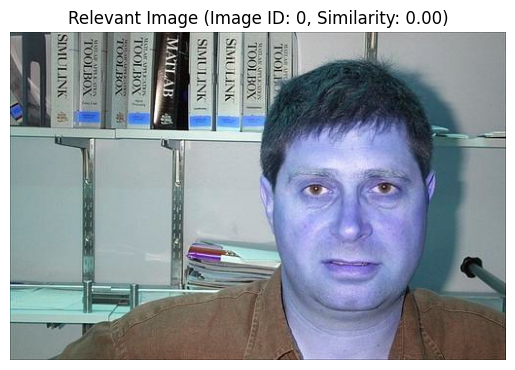

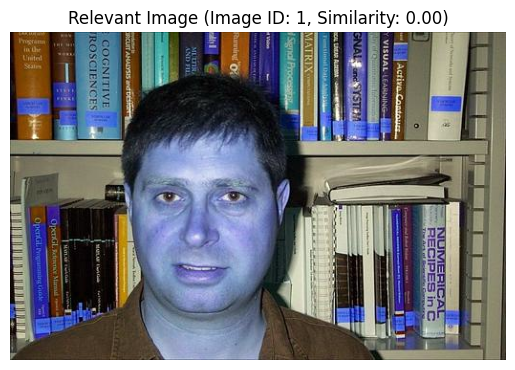

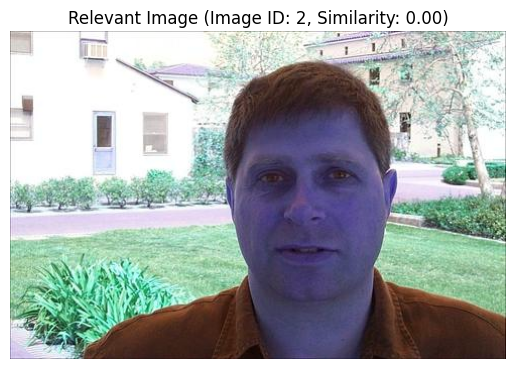

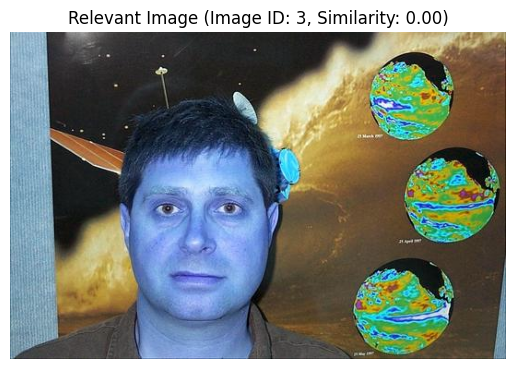

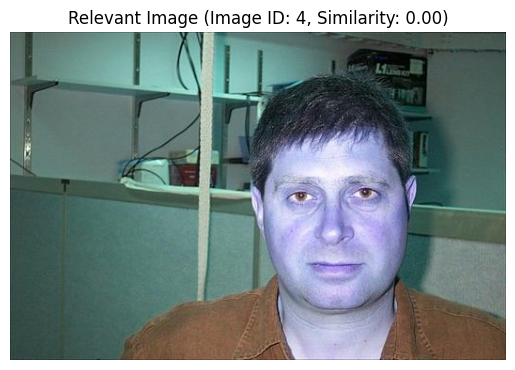

In [ ]:
query_label = int(input('ENTER QUERY LABEL: '))  # Change to the desired query label
feature_model = input('ENTER FEATURE MODEL: ')# eg:Color Moments Features'
find_relevant_images(query_label, feature_model)

**TASK 2**

In [ ]:
import pandas as pd
import cv2
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from torchvision.datasets import Caltech101
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math
from math import nan


# Load the DataFrame containing extracted features

# Function to calculate cosine similarity between two feature vectors
def calculate_cosine_similarity(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

# Function to find and list k most likely matching labels under the selected feature space
def find_matching_labels(image_id, feature_model, k=5):
    # Select the feature vectors and image IDs for the specified feature model
    feature_vectors = df[feature_model]  # Convert string representation to actual list
    feature_vectors=feature_vectors.dropna()
    image_ids = df['ImageID'].values
    query_image = feature_vectors[image_id]
    # Read and preprocess the query image
    query_image = np.asarray(query_image)
    query_image = cv2.convertScaleAbs(query_image, alpha=(255.0/65535.0))

    query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    query_image = transforms.ToTensor()(query_image)
    query_image = query_image.unsqueeze(0)  # Add batch dimension
    query_image = np.asarray(query_image)
   # feature_vectors = np.asarray(feature_vectors)
    # Calculate similarities with all feature vectors
    query_vector = feature_extraction(query_image, feature_model)
    #query_image = np.asarray(query_image)
   # print('query_image',query_image)
    #print('feature_vectors',feature_vectors)
    query_image = query_image[np.isfinite(query_image)]
    #feature_vectors = feature_vectors[np.isfinite(feature_vectors)]
    newList=[]
    featureVec=[]
    for vec in feature_vectors:
      for element in vec:
        if not math.isnan(element):
            newList.append(element)
      featureVec.append(newList)
    similarities = [cosine_similarity(np.asarray(query_image).reshape(-1, 1), np.asarray(vec).reshape(-1, 1))[0][0] for vec in feature_vectors]

    # Sort labels based on similarity scores
    sorted_indices = np.argsort(similarities)[::-1][:k]
    matching_labels = [df['Image Label'].iloc[idx] for idx in sorted_indices]
    matching_scores = [similarities[idx] for idx in sorted_indices]

    return matching_labels, matching_scores

# Function to extract features using the RESNET50 model
class ResNet50FeatureExtractor(nn.Module):
    def __init__(self):
        super(ResNet50FeatureExtractor, self).__init__()
        resnet50 = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
        modules = list(resnet50.children())[:-1]  # Remove the last fully connected layer
        self.resnet50 = nn.Sequential(*modules)

    def forward(self, x):
        return self.resnet50(x)

# Function to extract features using the selected feature model
def feature_extraction(query_image, feature_model):
    if feature_model == 'ResNet-AvgPool-1024':
        extractor = ResNet50FeatureExtractor()
        extractor.eval()  # Set to evaluation mode
        with torch.no_grad():
            features = extractor(query_image)
            features = F.avg_pool2d(features, kernel_size=7)
            features = features.view(features.size(0), -1)
        return features[0].numpy()

# Function to find and list k most likely matching labels using RESNET50
# def find_matching_labels_resnet50(image_id, k=5):
#     # Load RESNET50 model and perform feature extraction
#     query_image = feature_vectors[image_id]
#     resnet50 = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
#     resnet50.eval()  # Set to evaluation mode
#     with torch.no_grad():
#         query_image = transforms.ToTensor()(query_image)
#         query_image = query_image.unsqueeze(0)  # Add batch dimension
#         features = resnet50(query_image)
#         features = F.avg_pool2d(features, kernel_size=7)
#         features = features.view(features.size(0), -1)

#     # Calculate similarities with all feature vectors
#     feature_vectors = df['ResNet-AvgPool-1024'].apply(eval)  # Convert string representation to actual list
#     similarities = [calculate_cosine_similarity(features[0].numpy(), vec) for vec in feature_vectors]

#     # Sort labels based on similarity scores
#     sorted_indices = np.argsort(similarities)[::-1][:k]
#     matching_labels = [df['Image Label'].iloc[idx] for idx in sorted_indices]
#     matching_scores = [similarities[idx] for idx in sorted_indices]

#     return matching_labels, matching_scores

def find_matching_labels_resnet50(image_id, k=5):
    # Load RESNET50 model and perform feature extraction
    resnet50 = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
    resnet50.eval()  # Set to evaluation mode
    feature_vectors = df['Feature Vector Resnet50 AvgPool']  # Convert string representation to actual list
    image_ids = df['ImageID'].values
    query_vector = feature_vectors[image_id]
    # Get the feature vector for the query image using image ID
  #  query_vector = df[df['ImageID'] == image_id]['ResNet-AvgPool-1024'].apply(eval).values[0]

    # Calculate similarities with all feature vectors
    feature_vectors = df['Feature Vector Resnet50 AvgPool']  # Convert string representation to actual list
    similarities = [calculate_cosine_similarity(query_vector, vec) for vec in feature_vectors]

    # Sort labels based on similarity scores
    sorted_indices = np.argsort(similarities)[::-1][:k]
    matching_labels = [df['Image Label'].iloc[idx] for idx in sorted_indices]
    matching_scores = [similarities[idx] for idx in sorted_indices]

    return matching_labels, matching_scores


In [ ]:
# Example usage for Task 2a:
#query_image = cv2.imread('query_image.jpg')  # Replace with your query image
feature_model = 'Feature Vector CM'  # Change to the desired feature model
k = 5
image_id=1
matching_labels, matching_scores = find_matching_labels(image_id, feature_model, k)
print("Task 2a Results:")
for label, score in zip(matching_labels, matching_scores):
    print(f"Label: {label}, Score: {score:.2f}")

Task 2a Results:
Label: 0, Score: 0.00
Label: 0, Score: 0.00
Label: 0, Score: 0.00
Label: 0, Score: 0.00
Label: 0, Score: 0.00


In [ ]:
# Example usage for Task 2b:
query_image_resnet50 = cv2.imread('query_image.jpg')  # Replace with your query image
k_resnet50 = 5
image_id=1
matching_labels_resnet50, matching_scores_resnet50 = find_matching_labels_resnet50(image_id, k_resnet50)
print("\nTask 2b Results:")
for label, score in zip(matching_labels_resnet50, matching_scores_resnet50):
    print(f"Label: {label}, Score: {score:.2f}")

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 147MB/s]



Task 2b Results:
Label: 0, Score: 1.00
Label: 0, Score: 0.94
Label: 0, Score: 0.92
Label: 0, Score: 0.92
Label: 0, Score: 0.91


**TASK 3**

In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
import numpy as np

# Load the DataFrame containing extracted features
df = pd.read_csv('output1 (1).csv')

# Function to perform dimensionality reduction using SVD
def perform_svd(feature_vectors, n_components):
    svd = TruncatedSVD(n_components=n_components)
    return svd.fit_transform(feature_vectors)

# Function to perform dimensionality reduction using NNMF (Non-Negative Matrix Factorization)
def perform_nnmf(feature_vectors, n_components):
    nmf = NMF(n_components=n_components)
    return nmf.fit_transform(feature_vectors)

# Function to perform dimensionality reduction using LDA (Latent Dirichlet Allocation)
def perform_lda(feature_vectors, n_components):
    lda = LatentDirichletAllocation(n_components=n_components)
    return lda.fit_transform(feature_vectors)

# Function to perform dimensionality reduction using k-means clustering
def perform_kmeans(feature_vectors, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_transform(feature_vectors)

# Function to report the top-k latent semantics
def report_top_latent_semantics(feature_model, n_components, reduction_technique, k=5):
    # Select the feature vectors for the specified feature model
    feature_vectors = df[feature_model].apply(eval)  # Convert string representation to actual list

    # Perform dimensionality reduction based on the chosen technique
    if reduction_technique == 'SVD':
        latent_semantics = perform_svd(feature_vectors, n_components)
    elif reduction_technique == 'NNMF':
        latent_semantics = perform_nnmf(feature_vectors, n_components)
    elif reduction_technique == 'LDA':
        latent_semantics = perform_lda(feature_vectors, n_components)
    elif reduction_technique == 'k-means':
        latent_semantics = perform_kmeans(feature_vectors, n_components)
    else:
        print("Invalid dimensionality reduction technique")
        return

    # Calculate weights for each image based on latent semantics
    image_ids = df['ImageID'].values
    weights = np.linalg.norm(latent_semantics, axis=1)  # Using L2 norm as weights

    # Sort imageID-weight pairs based on weights in decreasing order
    sorted_indices = np.argsort(weights)[::-1][:k]
    top_image_ids = [image_ids[idx] for idx in sorted_indices]
    top_weights = [weights[idx] for idx in sorted_indices]

    # Store the latent semantics and imageID-weight pairs in an output file
    output_filename = f'latent_semantics_{feature_model}_{reduction_technique}_{n_components}.csv'
    pd.DataFrame({'ImageID': top_image_ids, 'Weight': top_weights}).to_csv(output_filename, index=False)

# Example usage:
feature_model = 'Feature Vector CM'  # Change to the desired feature model
n_components = 10  # Change to the desired number of components for dimensionality reduction
reduction_technique = 'SVD'  # Change to the desired dimensionality reduction technique
k = 5  # Change to the desired value of k
report_top_latent_semantics(feature_model, n_components, reduction_technique, k)


ValueError: ignored

In [ ]:
df = pd.read_csv('output1 (1).csv')
df

In [ ]:
from ast import literal_eval
df=df.dropna()
# Convert string representations of lists to actual lists
df['Image'] = df['Feature Vector CM'].apply(literal_eval)
df['Feature Vector CM'] = df['Feature Vector CM'].apply(literal_eval)
df['Feature Vector HOG'] = df['Feature Vector HOG'].apply(literal_eval)
df['Feature Vector Resnet50 AvgPool'] = df['Feature Vector Resnet50 AvgPool'].apply(literal_eval)
df['Feature Vector Resnet50 Layer3'] = df['Feature Vector Resnet50 Layer3'].apply(literal_eval)
df['Feature Vector Resnet50 FC'] = df['Feature Vector Resnet50 FC'].apply(literal_eval)
df['Image Label'] = df['Image Label'].apply(literal_eval)
df

In [ ]:
feature_vectors = df[feature_model]
query_vector = feature_vectors[df['Image Label'] == query_label].iloc[0]
query_vector

In [ ]:
df['Image Label'].values